In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

%matplotlib inline

In [13]:
stop_words = stopwords.words("english")
obamacare = pd.read_csv(
    "/Users/rohitkandala/Desktop/UChicago/Academic Quarters/2022-23/Spring 2023/CAPP 30254/Final Project/ml-affordable-care-act/ml-affordable-care-act/data/obamacare_19_23.csv"
)
obamacare.head()

,Id,Date,Text
0,1641893127261945857,2023-03-31,This affects nearly 168 million people on empl...
1,1641879286805155848,2023-03-31,"OK so, insurance companies are being given the..."
2,1641871341581131777,2023-03-31,Texas judge rules against free preventive care...
3,1641860778788569094,2023-03-31,"Texas judge strikes down free HIV drugs, cance..."
4,1641860772669128705,2023-03-31,"Texas judge strikes down free HIV drugs, cance..."


In [14]:
obamacare.shape

(36724, 3)

Below the tweet text is preprocessed to remove stop words and punctuation.

In [15]:
tweets = obamacare.copy()
tweets["clean_text"] = tweets["Text"].apply(
    lambda x: " ".join([word for word in x.split() if word.lower() not in (stop_words)])
)
tweets["clean_text"] = tweets["clean_text"].str.replace("[^\w\s]", "")

/var/folders/y5/8z_6wzg13h79rh9fq0cqx6h00000gn/T/ipykernel_5769/274837305.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets["clean_text"] = tweets["clean_text"].str.replace("[^\w\s]", "")


In [16]:
def plot_tweets_per_year(tweets):
    tweets["Date"] = pd.to_datetime(tweets["Date"], format="%Y-%m-%d")
    tweets["Year"] = tweets["Date"].dt.year
    tweets["Month"] = tweets["Date"].dt.month
    counts = tweets.groupby(["Year"]).count()["clean_text"].reset_index()

    plt.bar(counts["Year"], counts["clean_text"])
    plt.title("Obamacare Related Tweets per Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Tweets")

    plt.show()


def plot_tweets_per_month(tweets):
    tweets["Date"] = pd.to_datetime(tweets["Date"], format="%Y-%m-%d")
    tweets["Year"] = tweets["Date"].dt.year
    tweets["Month"] = tweets["Date"].dt.month
    counts = tweets.groupby(["Year", "Month"]).count()["clean_text"].reset_index()
    pivoted_counts = counts.pivot(index="Month", columns="Year", values="clean_text")

    pivoted_counts.plot()
    month_names = [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ]
    plt.xticks(range(1, 13), month_names)
    plt.title("Obamacase Related Tweets per Month by Year")
    plt.xlabel("Month")
    plt.ylabel("Number of Tweets")

    plt.show()

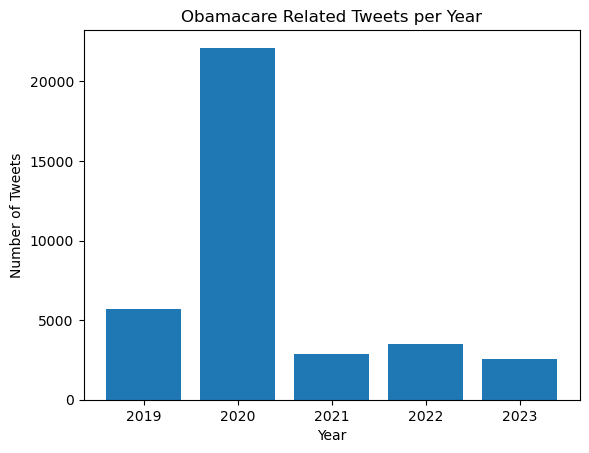

In [17]:
plot_tweets_per_year(tweets)

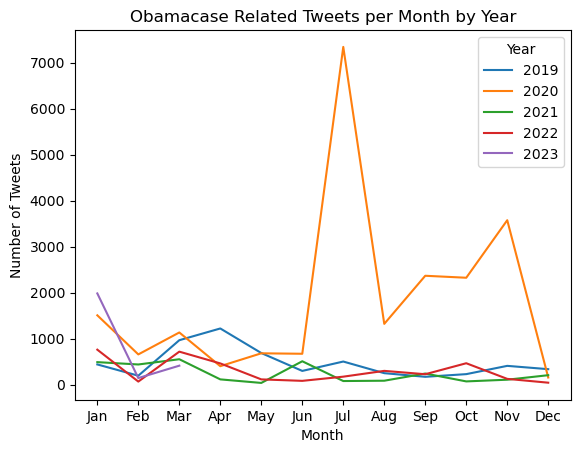

In [18]:
plot_tweets_per_month(tweets)

Below analyzes the number of hashtags that appear in the Tweets and their frequencies 

In [19]:
tweets["hashtags"] = tweets.Text.str.findall(r"#.*?(?=\s|$)")
tweets = tweets[tweets.astype(str)["hashtags"] != "[]"]
top10 = tweets["hashtags"].value_counts().to_frame().reset_index()
top10.rename(columns={"index": "hashtags", "hashtags": "count"}, inplace=True)
top10.head(10)
# Top 10 hashtags that appear from the tweets

,hashtags,count
0,"[#Obamacare, #ACA]",576
1,[#ACA],330
2,[#COVID19],270
3,[#Medicare4All],261
4,[#Obamacare],229
5,"[#ExecutiveOrder..., #Trump, #Obamacare, #…]",221
6,"[#lemmings, #magats, #hea…]",144
7,"[#ObamaCare, #ACA]",140
8,"[#obamacare, #aca, #affordablecareact]",135
9,[#Obamacare/#ACA],117
